In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
'''
P0. Implement a list
'''

class LNode:
    def __init__(self,val):
        self.val = val
        self.next = None

In [4]:
# Create a function for decomposing the parameter mode

def parameter_modes(code):
    
    # Add leading zeros to make 5 digits
    c_str = '0'*(5-len(str(code)))+str(code)
    
    return [c_str[0],c_str[1],c_str[2], c_str[3:]]

In [5]:
incom0 = np.fromfile('19_input.txt',sep=",").astype(int)

incom0 = np.append(incom0, np.zeros(1000)).astype(int)

for i, value in enumerate(incom0):
    vars()['node'+str(i)]=LNode(value)

In [6]:
len(incom0)

1424

In [7]:
def intcode_call(signal_input, incom, pointer_position=0, relative_base=0, reinitialize = False):
    # Re-read input to reset intcom program
    if reinitialize == True:
        incom = np.fromfile('13_input.txt',sep=",").astype(int)
        
    for j, value in enumerate(incom):
        vars()['node'+str(j)]=LNode(value)

    mem = signal_input

    output = []
    
    rel_base = relative_base
    i = pointer_position

    while i <= len(incom):
        
        #print(i)

        # decode the parameter modes
        p_modes = parameter_modes(vars()['node'+str(i)].val)

        # build instruction

        # retrieve parameters for specific opcode
        if p_modes[-1] in ['99']:
            instr = [99]
            #print('Opcode 99 executed.')
            
            # Prepare incom for return
            incom_out = []
            for j in range(len(incom)):
                incom_out = incom_out + [vars()['node'+str(j)].val]
            #print('program complete')
            
            #output = []
            
            return output, incom_out, i, rel_base
            break
        
        elif p_modes[-1] in ['01', '02', '07', '08']:
            instr = [int(p_modes[-1])]
            for j in range(i+1, i+4):
                instr += [vars()['node'+str(j)].val]
            i += 4

        elif p_modes[-1] in ['03', '04','09']:
            instr = [int(p_modes[-1])] + [vars()['node'+str(i+1)].val]
            i += 2

        elif p_modes[-1] in ['05', '06']:
            instr = [int(p_modes[-1])]
            for j in range(i+1, i+3):
                instr += [vars()['node'+str(j)].val]
            i += 3

        else:
            print('Uh oh... intruction not understood')
            break
            
        #print(p_modes)
        #print(instr)


        # Execute instructions
        
        # ADDITION # ==========================================================================
        if instr[0] == 1:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # if parameter is in relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                
            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # if parameter is in relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            ab = a+b # calculate the overwrite value

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # if parameter is in relative mode
                if rel_base + instr[3] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab

        
        # MULTIPLICATION # =========================================================
        elif instr[0] == 2:
            # define a
            a = instr[1] # default is immediate mode
            #print('immediate mode a = ' + str(a))
            if p_modes[2] == '0': # if parameter is position mode
                #print('position mode a = ' + str(a))
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # if parameter is in relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                #print('relative mode a = ' + str(a))

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # if parameter is in relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            ab = int(a)*int(b) # calculate the overwrite value

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # if parameter is in relative mode
                if rel_base + instr[3] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab

        # INPUT # =====================================================================        
        elif instr[0] == 3:
            # write input (mem)
            if p_modes[2] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[1])].val = mem[0]
                mem = mem[1:]
            else:
                #print(len(mem))
                vars()['node'+str(instr[1])].val = mem[0]
                mem = mem[1:]
        
        
        # OUTPUT # =================================================================
        elif instr[0] == 4:
            # define a
            #print('output parameter mode: ' + str(p_modes[2]) +
            #      ', parameter: ' + str(instr[1]))
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                

            # write to output
            output = output + [a]
            #print('output:', output)
            #if len(output) == 1:
                # Repackage the nodes as incom
                #incom_out = []
                #for j in range(len(incom)):
                    #incom_out = incom_out + [vars()['node'+str(j)].val]

                #return output, incom_out, i, rel_base

        
        # JUMP IF TRUE # ===========================================================
        elif instr[0] == 5:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                #print('retrieving node ' + str(instr[1]))
                a = vars()['node'+str(instr[1])].val
                #print('a is' + str(a))
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                print("'Write' fail for jump-if-true. Check for parameter mode 2!")
                break
            else:
                #print('a is' + str(a))
                if a != 0:
                    i = b
                    
                    
        # JUMP IF FALSE # ===========================================================
        elif instr[0] == 6:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                print("'Write' fail for jump-if-false. Check for parameter mode 2!")
                break
            else:
                if a == 0:
                    i = b
                    
        # LESS THAN # ==========================================================================
        elif instr[0] == 7:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # apply test
            if a < b:
                #print(str(a) + 'is less than' + str(b))
                ab = 1
            else:
                #print(str(a) + 'is NOT less than' + str(b))
                ab = 0                

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                vars()['node'+str(rel_base + instr[3])].val = ab 
            else:
                #print('setting node ' + str(instr[3]) + 'to be ' + str(ab))
                vars()['node'+str(instr[3])].val = ab 

        # EQUALS # ========================================================================
        elif instr[0] == 8:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # apply test
            if a == b:
                ab = 1
            else:
                ab = 0                

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab
                
        # ADJUST RELATIVE BASE # =============================================================
        elif instr[0] == 9:
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                
            # execute: adjust relative base
            if p_modes[1] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[1] == '2': # relative mode
                print("'Write' fail for jump-if-false. Check for parameter mode 2!")
                break
            else:
                rel_base += a
                #print('Relative base now:'+str(rel_base))
                

        else:
            print('Instruction not understood!')
            break

    #if i > len(incom):
    #    print('End of input code reached.')
        
    # Repackage the nodes as incom
    incom_out = []
    for j in range(len(incom)):
        incom_out = incom_out + [vars()['node'+str(j)].val]
        
    print('returning at end of intcode')

    return output, incom_out, i, rel_base

Run the Intcode to get the camera feed:



In [8]:
# test origin coordinate
coord = [0,0]
output, incom, pointer, relative_base = intcode_call(signal_input=coord, incom=incom0, pointer_position=0, relative_base=0)
output

[1]

Okay, great. Things are working!
Let's track the tractor beam test results in an array.

In [9]:
# intitialize the tractor beam array
beam_map = np.zeros((50,50))

# Remember that AoC defines x-> and y|v - deal with this during plotting!
for i in range(50):
    for j in range(50):
        beam_map[i,j] = intcode_call(signal_input=[i,j], incom=incom0, pointer_position=0, relative_base=0)[0][0]

In [10]:
beam_map[0,25]=0

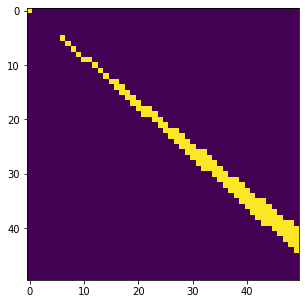

In [11]:
# plot the results:
plt.figure(figsize=(5,5))
plt.imshow(beam_map.T)

In [12]:
# Okay, now find all non-zero values in matrix
len(np.where(beam_map == 1)[0])

118

Part II

In [13]:
# I need to find where this square will fit
# I noticed that the runtime to generate this map was non-trivial
# I don't think it's an option to simulate the whole map.

# Let's get some efficiency by only simulating within a certain angle

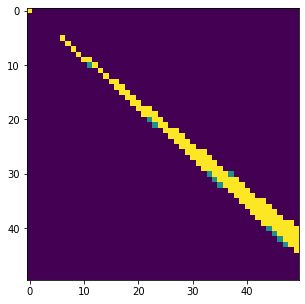

In [30]:
# intitialize the tractor beam array
beam_map2 = np.zeros((50,50))-1
beam_map2[0,0] = 1

# Remember that AoC defines x-> and y|v - deal with this during plotting!
for i in range(50):
    angles = np.radians([47.5,51]) # specified in degrees
    for j in range(1,50):
        if math.atan(i/j) > angles[0] and math.atan(i/j) < angles[1]:
            #beam_map2[i,j] = 1
            beam_map2[i,j] = intcode_call(signal_input=[i,j], incom=incom0, pointer_position=0, relative_base=0)[0][0]
            
# plot the results:
plt.figure(figsize=(5,5))
plt.imshow(beam_map2.T)

In [16]:
# Okay, now verify we're seeing all cells. This should match our Part I answer of 118
len(np.where(beam_map2 == 1)[0])

118

That's a relief!

Now... let's guess how far out it might be. For a 100x100 cell square, the diagonal would have to fit into base of a 3.5 degree isosoltriangle.

I think what we're looking for isosceles triangle with a bass (half diagonal of 100 x 100 square) and an angle of about 1.25 degrees. Solve for the triangle height!

In [23]:
iso_height = (np.sqrt(2*(100**2))/2)/math.tan(np.radians(3.5/2))
iso_height

2314.3791423252596

Okay, now this is the distance to the diagonal of the square. Solve for the x and y coordinates... of the nearest corner of the square.

In [25]:
y_ish = math.cos(np.radians(49.25))*(iso_height - np.sqrt(2*(100**2)))
x_ish = math.sin(np.radians(49.25))*(iso_height - np.sqrt(2*(100**2)))

[x_ish, y_ish]

[1646.1567312849168, 1418.4193865587156]

Okay, that should be the neighbourhood that we're looking in.

Let's test it out!

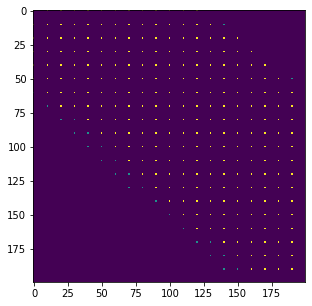

In [29]:
# intitialize the tractor beam array
beam_map3 = np.zeros((200,200))-1 # This array will represent coordinates [1600:1800, 1400:1600]

# Remember that AoC defines x-> and y|v - deal with this during plotting!
angles = np.radians([47.5,51]) # specified in degrees
for i in range(1600,1800,10):
    for j in range(1400,1600,10):
        if math.atan(i/j) > angles[0] and math.atan(i/j) < angles[1]:
            #beam_map2[i,j] = 1
            beam_map3[i-1600,j-1400] = intcode_call(signal_input=[i,j], incom=incom0, pointer_position=0, relative_base=0)[0][0]
            
# plot the results:
plt.figure(figsize=(5,5))
plt.imshow(beam_map3.T)

We're in the neighbourhood, for sure. Let's start the square somewhere we know it will fit, and then shift the square until it won't fit anymore.

In [86]:
# Define a function that tests whether a point is inside the beam:
def point(coord):
    if intcode_call(signal_input=coord, incom=incom0, pointer_position=0, relative_base=0)[0][0] == 1:
        return True
    else:
        return False

# Define a function that tests whether corner points are inside the beam:
def corners(coord): # coord is the coordinate of the closest corner to my tractor beam
    coord_bottom = np.add(coord,[0,99])
    coord_top = np.add(coord,[99,0])
    if not point(coord):
        print('Reference coordinates not in beam!')
        return [False,99] # I guess 99 is a kind of error code!
    elif not point(coord_bottom) and not point(coord_top):
        return [False, 3] # returns 3 if neither corner is in beam
    elif not point(coord_bottom):
        return [False,2] # returns 2 if bottom corner not in beam
    elif not point(coord_top):
        return [False,1] # returns 1 if top corner not in beam
    elif point(coord_bottom) and  point(coord_top):
        return [True,0] # returns 0 if all corners in beam
    else:
        return [False,98] # another error code

In [87]:
# Test it...
corners([1900,1624])

[True, 0]

In [89]:
# Use this coord as the starting point, then let the square move to the tractor beam

coord_start = [1900,1624]
coord = coord_start[:]
run = True
last_condition = True

while run == True:

    interim = corners(coord) # create interim to avoid running intcode multiple times
    
    #print(coord,interim)
    
    if last_condition == False and interim[0] == False: # if the last move failed to remedy the situation...
        break
    
    if interim[0] == True:
        last_true_coord = coord[:]
        coord = np.add(coord, [-1,-1])
        last_condition = True
    elif interim[1] == 1:
        coord = np.add(coord, [0,1])
        last_condition = False
    elif interim[1] == 2:
        coord = np.add(coord, [1,0])
        last_condition = False
    elif interim[2] == 3: # if both corners are moved out of beam
        break
        
last_true_coord

array([1865, 1593])

In [90]:
# Convert it to answer digits....
last_true_coord[0]*10000+last_true_coord[1]

18651593